## Data Preparation

In [ ]:
# importing librari
# Data manipulation
import pandas as pd
import numpy as np

# Data visualization1
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Statistical analysis
from scipy import stats
import statsmodels.api as sm
from scipy.stats import chi2_contingency
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Machine learning utilities
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Classification models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

# Handling imbalanced data
from imblearn.over_sampling import SMOTE, SMOTENC

# Performance metrics
from sklearn.metrics import (
    accuracy_score, f1_score, recall_score, precision_score, 
    confusion_matrix, roc_curve, roc_auc_score, classification_report
)

# Filtering future warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# loading the dataset
df = pd.read_csv(r"C:\Users\wanji\Documents\Flatiron\Capstone Project\Africa_1997-2025_Feb28 conflict prediction data.csv")

#### Understanding the Data Check dataset structure (columns, data types, and few rows).

In [4]:
# Preview a few entries
df.iloc[221007:221017]

,event_id_cnty,event_date,year,time_precision,disorder_type,event_type,sub_event_type,actor1,assoc_actor_1,inter1,...,location,latitude,longitude,geo_precision,source,source_scale,notes,fatalities,tags,timestamp
221007,SAF11601,2019-09-12,2019,1,Demonstrations,Protests,Peaceful protest,Protesters (South Africa),NaN,Protesters,...,Rustenburg,-25.6667,27.2500,1,African News Agency,National,12 September. Taxi drivers marched in Rustenbu...,0,crowd size=500,1632239610
221008,SAF11618,2019-09-12,2019,1,Demonstrations,Protests,Peaceful protest,Protesters (South Africa),UPM: Unemployed Peoples Movement,Protesters,...,Makhanda,-33.3042,26.5328,1,GroundUp,National,12 September. Members from the Unemployed Peop...,0,crowd size=170,1632782396
221009,SIE4973,2019-09-12,2019,1,Demonstrations,Protests,Peaceful protest,Protesters (Sierra Leone),SLPP: Sierra Leone People's Party,Protesters,...,Konika,9.4570,-12.6220,2,WANEP-SL,Local partner-Other,"On 12 September 2019, residents protested agai...",0,crowd size=no report,1633382060
221010,ALG7154,2019-09-12,2019,1,Demonstrations,Protests,Peaceful protest,Protesters (Algeria),Labor Group (Algeria),Protesters,...,Algiers,36.7525,3.0420,1,ATUC,Other,"On 12 September 2019, workers held a demonstra...",0,crowd size=no report,1649286148
221011,DRC15507,2019-09-12,2019,1,Demonstrations,Protests,Peaceful protest,Protesters (Democratic Republic of Congo),Labor Group (Democratic Republic of Congo),Protesters,...,Tshikapa,-6.4162,20.8000,1,7 Sur 7,National,"On 12 September 2019, in Tshikapa, unspecified...",0,crowd size=no report,1649875332
221012,CEN47216,2019-09-12,2019,1,Demonstrations,Protests,Peaceful protest,Protesters (Democratic Republic of Congo),Protesters (South Sudan); Refugees/IDPs (Democ...,Protesters,...,Obo,5.4039,26.4946,1,Radio Ndeke Luka,National,"On 12 September 2019, unspecified number of DR...",0,crowd size=no report,1649875332
221013,CEN47219,2019-09-12,2019,1,Political violence,Violence against civilians,Attack,LRA: Lords Resistance Army,NaN,Rebel group,...,Ligoua-Zewia,5.2212,26.6000,2,Twitter; Crisis Tracker,New media-International,"On 12 September 2019, near Ligoua, suspected L...",0,NaN,1649875332
221014,DRC15492,2019-09-12,2019,1,Strategic developments,Strategic developments,Change to group/activity,Mayi Mayi Militia,NaN,Political militia,...,Makumbo,0.6185,29.4864,1,CRDH,Other,"On 12 September 2019, in Makumbo, at least 250...",0,NaN,1649875332
221015,DRC15515,2019-09-12,2019,1,Political violence,Battles,Armed clash,NDC-R: Nduma Defence of Congo (Renove),APCLS-M: Alliance of Patriots for a Free and S...,Political militia,...,Loashi,-1.3607,28.7921,1,Kivu Security Tracker,Other,"On 12 September 2019, in Loashi, NDC-R and APC...",0,NaN,1649875332
221016,NIR1001,2019-09-12,2019,1,Strategic developments,Strategic developments,Agreement,Government of Niger (2011-2021),NaN,State forces,...,Diffa,13.3200,12.6100,1,Urgence Diffa,New media,"On 12 September 2019, customary chiefs and gro...",0,NaN,1652899807


In [5]:
# checking the shape of the dataset
print(f"This dataset contains {df.shape[0]} rows and {df.shape[1]} columns\n")
print(f"This are the columns available in the dataset {df.columns} columns")

This dataset contains 413947 rows and 31 columns

This are the columns available in the dataset Index(['event_id_cnty', 'event_date', 'year', 'time_precision',
       'disorder_type', 'event_type', 'sub_event_type', 'actor1',
       'assoc_actor_1', 'inter1', 'actor2', 'assoc_actor_2', 'inter2',
       'interaction', 'civilian_targeting', 'iso', 'region', 'country',
       'admin1', 'admin2', 'admin3', 'location', 'latitude', 'longitude',
       'geo_precision', 'source', 'source_scale', 'notes', 'fatalities',
       'tags', 'timestamp'],
      dtype='object') columns


In [6]:
# check statistics
df.describe()

,year,time_precision,iso,latitude,longitude,geo_precision,fatalities,timestamp
count,413947.000000,413947.000000,413947.000000,413947.000000,413947.000000,413947.000000,413947.000000,4.139470e+05
mean,2017.527964,1.130737,510.399988,6.922263,21.886800,1.279074,2.439153,1.676141e+09
std,6.608510,0.393477,250.075057,15.495063,16.776814,0.494604,24.320917,5.263689e+07
min,1997.000000,1.000000,12.000000,-34.706800,-25.163100,1.000000,0.000000,1.552576e+09
25%,2015.000000,1.000000,231.000000,0.315600,8.155500,1.000000,0.000000,1.622068e+09
50%,2020.000000,1.000000,566.000000,6.693600,28.043600,1.000000,0.000000,1.689711e+09
75%,2022.000000,1.000000,710.000000,13.515700,33.483300,2.000000,1.000000,1.724714e+09
max,2025.000000,3.000000,894.000000,37.281500,64.683200,3.000000,1350.000000,1.741072e+09


In [7]:
print(f"The shows more information about the dataset, that is the entries and data type per column\n")
df.info()

The shows more information about the dataset, that is the entries and data type per column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413947 entries, 0 to 413946
Data columns (total 31 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   event_id_cnty       413947 non-null  object 
 1   event_date          413947 non-null  object 
 2   year                413947 non-null  int64  
 3   time_precision      413947 non-null  int64  
 4   disorder_type       413947 non-null  object 
 5   event_type          413947 non-null  object 
 6   sub_event_type      413947 non-null  object 
 7   actor1              413947 non-null  object 
 8   assoc_actor_1       114747 non-null  object 
 9   inter1              413947 non-null  object 
 10  actor2              301956 non-null  object 
 11  assoc_actor_2       85527 non-null   object 
 12  inter2              301956 non-null  object 
 13  interaction         413947 non-null  objec

### Data Cleaning Plan
> 1. Dropping irrelevant data i.e columns that do not add value to the analysis
> 2. Handling Missing Data Fill or drop missing values based on relevance.
> 3. Removing Duplicates if any exist.
> 4. Detect and remove extreme values that could distort analysis that is remove outliers
> 5. Cleaning Text Data that is renaming columns and correct of typos

NB: for the missing values this is the criteria that will be used:
> * If a column has 0% missing values, no cleaning is needed.
> * If a column has less than 5% missing values, you can either drop the missing rows or fill them using mean/median/mode.
> * If a column has more than 50% missing values, it may be better to drop the column entirely.

#### The following columns will be dropped as they are irrelevant to our anlaysis

> * event_id_cnty – Unique identifier for events (not useful for prediction).
> * timestamp – A Unix timestamp; redundant with event_date.
> * notes – Descriptive text that is difficult to quantify for modeling.
> * source & source_scale – Identifies where the data was collected but may not contribute to predicting future conflict.
> * tags – Sparse data and may not be structured enough for modeling.
> * assoc_actor_1 & assoc_actor_2 – Frequently missing values; may not provide strong predictive power. yet it is backed up by actor
> * iso - The iso column represents the ISO country code, which is a numeric identifier for each country.
> * time_precision - The time_precision column indicates how precise the event date is, hence it less useful.

In [8]:
df.drop(columns=[
    'event_id_cnty',
    'event_date',
    'time_precision',
    'assoc_actor_1',
    'assoc_actor_2',
    'iso',
    'source',
    'source_scale',
    'notes',
    'tags',
    'timestamp',
], inplace=True)
# preview the columns
df.columns

Index(['year', 'disorder_type', 'event_type', 'sub_event_type', 'actor1',
       'inter1', 'actor2', 'inter2', 'interaction', 'civilian_targeting',
       'region', 'country', 'admin1', 'admin2', 'admin3', 'location',
       'latitude', 'longitude', 'geo_precision', 'fatalities'],
      dtype='object')

In [9]:
# checking missing values
df.isna().sum()

year                       0
disorder_type              0
event_type                 0
sub_event_type             0
actor1                     0
inter1                     0
actor2                111991
inter2                111991
interaction                0
civilian_targeting    290800
region                     0
country                    0
admin1                    17
admin2                  3820
admin3                204055
location                   0
latitude                   0
longitude                  0
geo_precision              0
fatalities                 0
dtype: int64

#### plan to handle missing values

| Column  | Missing values  | Solution and reason                                  |
|---------|-----------------|------------------------------------------------------|
| actor2           | 111,991   | Fill with ***Unknown*** Some events may involve only one actor (e.g., protests, riots)         |
| inter2           | 111,991        | Fill with ***Unknown*** If actor2 is missing, inter2 (interaction type) is also unknown       |
| civilian_targeting | 290,800      | Fill with ***No*** Missing values likely mean civilians were not targeted             |
| admin1           | 17            | ***Drop rows*** only a few missing, so dropping won’t affect the dataset much      |
| admin2           | 3,820         | Fill with ***Unknown*** or mode District info missing, but "Unknown" preserves all events |
| admin3           | 204,055       | ***Drop column*** Too many missing values, making it unreliable for analysis                 |

In [10]:
# fill the rows with missing values
df[['actor2', 'inter2', 'admin2']] = df[['actor2', 'inter2', 'admin2']].fillna("Unknown")
df[['civilian_targeting']] = df[['civilian_targeting']].fillna("No")

In [11]:
"""
The civilian_targeting has two entries NO and civilian_targeting, for a better readibility
replacing civilian_targeting with yes will enhance the readability of this column
"""
# replace civilian_targeting with Yes
df['civilian_targeting'] = df['civilian_targeting'].replace({'Civilian targeting': 'Yes'})
# preview changes
df['civilian_targeting'].unique()

array(['No', 'Yes'], dtype=object)

In [12]:
# droping nan values and dropping column
df.dropna(subset=['admin1'], inplace=True)
# drop column
df.drop('admin3', axis=1, inplace=True)

In [13]:
# preview the missing values
print(f"The dataset contains {df.isna().sum().sum()} missing values")

The dataset contains 0 missing values


In [14]:
# checking for duplicates
print(f"The dataset contains {df.duplicated().sum()} duplicated rows")

The dataset contains 120924 duplicated rows


In [15]:
""" 
The dataset contain 120924 duplicated rows, to maintain data consistency while avoiding redundancy, 
we will keep only the first occurrence of each duplicate row and remove the rest
"""
# dropping duplicates while keeping first occurrence
df.drop_duplicates(keep="first", inplace=True)
# preview
print(f"The dataset contains {df.duplicated().sum()} duplicated rows")

The dataset contains 0 duplicated rows


#### Detecting and handling outliers

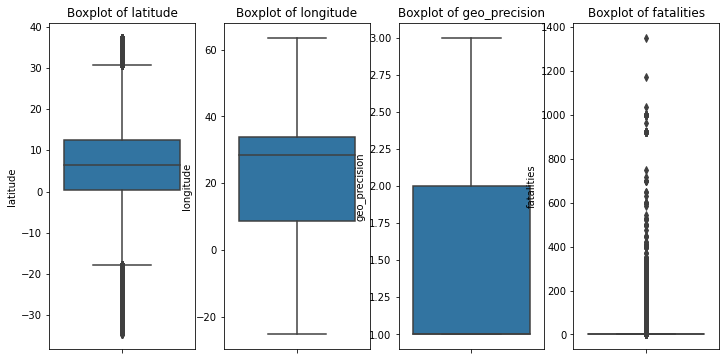

In [16]:
# Select numerical columns
num_cols = ['latitude', 'longitude', 'geo_precision', 'fatalities']
# Plot boxplots
plt.figure(figsize=(12, 6))
for i, col in enumerate(num_cols):
    plt.subplot(1, len(num_cols), i + 1)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
plt.show()

#### Outlier detection was conducted on numerical columns to identify potential extreme values. However, not all numerical columns require outlier removal.

> * Latitude & Longitude - It is a numerical column but it does not need outlier removal reason their extreme values do not necessarily indicate errors but rather represent real-world geographic locations, including conflict-prone areas. After checking for invalid coordinates none was found hence all data points were retained.
> * Geo Precision - is a numerical column that represents categorical levels of location accuracy for example, 1 = most precise, 3 = least precise and etc hence outlier detection does not apply here, so no modifications were made.
> * Fatalities is a numerical column where outlier detected alot of extreme numbers. In this case extreme numbers represent real conflict events rather than errors. Instead of removing these values as outliers, applying log transformation will help to reduce skewness while preserving valuable information.

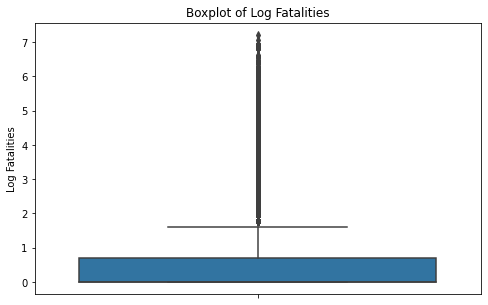

In [17]:
# Apply log transformation to fatalities
df['log_fatalities'] = np.log1p(df['fatalities'])
# preview viz
# Plot the boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(y=df['log_fatalities'])
plt.title("Boxplot of Log Fatalities")
plt.ylabel("Log Fatalities")
plt.show()

The log transformation applied to fatalities to reduced skewness and the impact of extreme values, making the distribution more manageable. This helps prevent the model from being overly influenced by very high fatality counts while preserving meaningful patterns.

### Exploratory Data Analysis (EDA)

#### Univariate Analysis

In [18]:
# for this anlayis we will copy our data and rename df to df1
df1 = df.copy()

In [19]:
# check the statistical distribution
df1.describe()

,year,latitude,longitude,geo_precision,fatalities,log_fatalities
count,293006.000000,293006.000000,293006.000000,293006.000000,293006.000000,293006.000000
mean,2017.505027,6.058650,22.679520,1.331079,2.693508,0.559398
std,6.601442,13.573443,16.250923,0.519928,18.015479,0.878351
min,1997.000000,-34.706800,-25.163100,1.000000,0.000000,0.000000
25%,2015.000000,0.340100,8.898800,1.000000,0.000000,0.000000
50%,2020.000000,6.416700,28.580000,1.000000,0.000000,0.000000
75%,2022.000000,12.495750,33.888500,2.000000,1.000000,0.693147
max,2025.000000,37.281500,63.475000,3.000000,1350.000000,7.208600


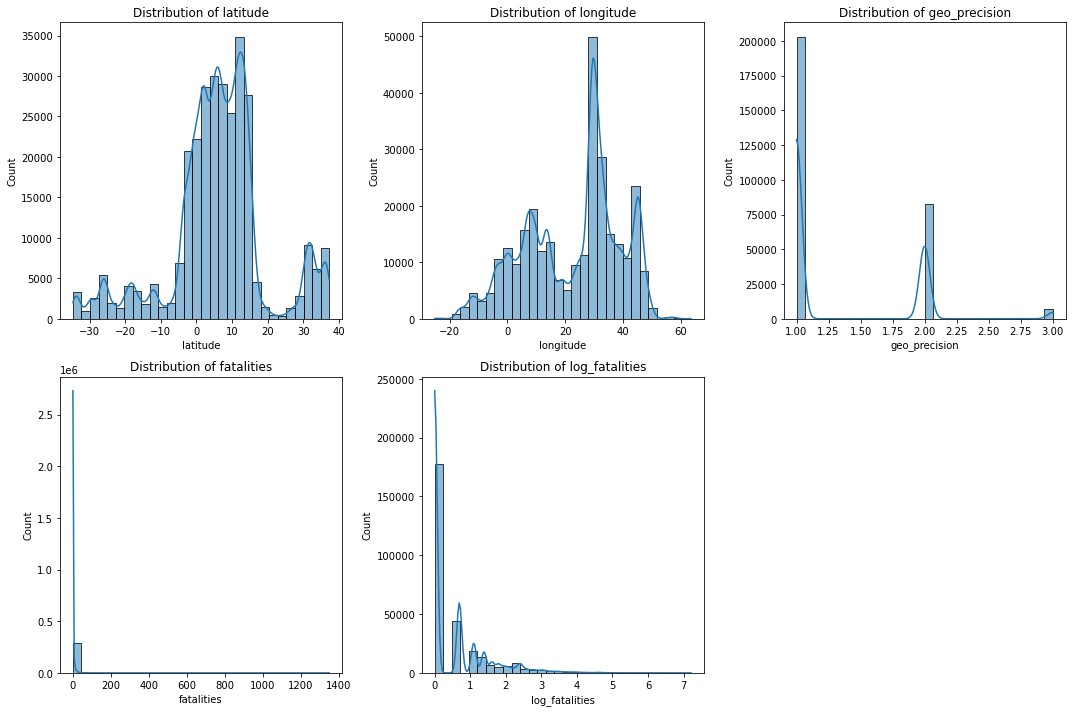

In [20]:
# Select numerical columns
num_cols = ['latitude', 'longitude', 'geo_precision', 'fatalities', 'log_fatalities']
# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
axes = axes.flatten()
# Plot histograms with KDE
for i, col in enumerate(num_cols):
    sns.histplot(df1[col], kde=True, bins=30, ax=axes[i])
    axes[i].set_title(f"Distribution of {col}")
# Remove empty subplot if odd number of plots
fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()

#### Interpretation of Numerical Variable Distributions

> * The latitude distribution shows clustering around specific values, indicating conflicts are concentrated in certain regions rather than evenly spread. Some extreme values suggest conflicts occur across a broad range.
> * The longitude distribution has multiple peaks, suggesting conflicts occur in distinct regions rather than being uniformly distributed. This reinforces the idea of localized conflict zones.
> * The geo_precision distribution shows most events have high location accuracy (1), but some have lower precision (2,3), indicating location uncertainty in certain records.
> * The fatalities distribution is highly skewed, with most events having low fatalities and a few extreme cases. The log transformation compresses the scale, reducing the impact of extreme values while maintaining the trend.

#### Performing Univariate Analysis in Categorical columns, For redability we will split the columns as follows:

> * Event Characteristics - disorder_type, event_type, sub_event_type, civilian_targeting
> * Actors & Interactions - actor1, inter1, actor2, inter2, interaction
> * Geographic Distribution - region, country, admin1, admin2, location

#### Event Characteristics

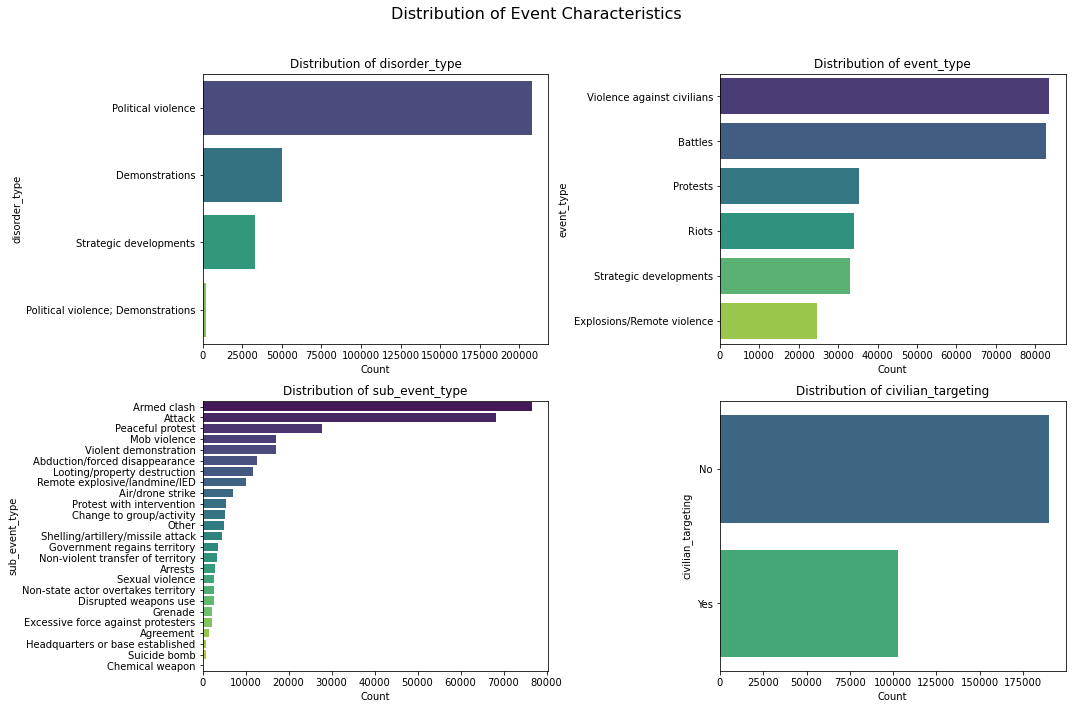

In [21]:
# Define the categorical columns to visualize
event_columns = ['disorder_type', 'event_type', 'sub_event_type', 'civilian_targeting']
# Set up the figure and axes
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Distribution of Event Characteristics', fontsize=16)
# Iterate through columns and plot
for ax, col in zip(axes.flatten(), event_columns):
    sns.countplot(y=df1[col], order=df1[col].value_counts().index, ax=ax, palette="viridis")
    ax.set_title(f'Distribution of {col}')
    ax.set_xlabel('Count')
    ax.set_ylabel(col)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


#### Event Characteristics Interpretation

> * Disorder Type - Political violence is the most dominant, followed by demonstrations. Strategic developments are less frequent.
> * Event Type - Battles and violence against civilians are the most common, highlighting armed conflicts and civilian attacks.
> * Sub-event Type - Armed clashes, peaceful protests, and attacks dominate, showing a mix of violent and non-violent actions.
> * Civilian Targeting - While most incidents don’t directly target civilians, a significant proportion still does.

#### Actors & Interactions

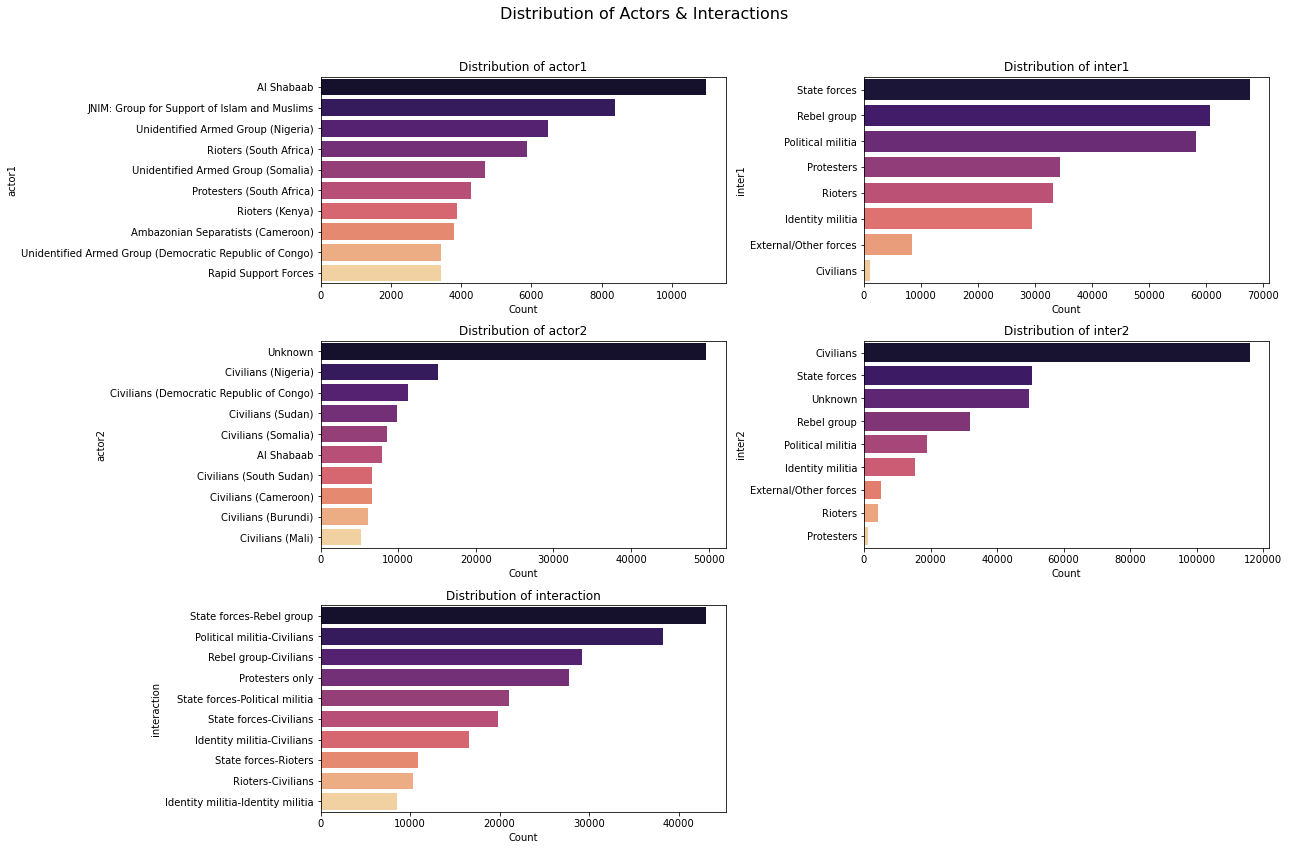

In [22]:
# Define the categorical columns to visualize
actor_columns = ['actor1', 'inter1', 'actor2', 'inter2', 'interaction']
# Set up the figure and axes dynamically based on the number of columns
num_plots = len(actor_columns)
rows = (num_plots // 2) + (num_plots % 2)  # Ensure enough rows
fig, axes = plt.subplots(rows, 2, figsize=(18, 12))

fig.suptitle('Distribution of Actors & Interactions', fontsize=16)
# Flatten axes only if there are multiple rows
if rows > 1:
    axes = axes.flatten()
else:
    axes = [axes]  
# Iterate through columns and plot
for i, col in enumerate(actor_columns):
    sns.countplot(y=df1[col], order=df1[col].value_counts().index[:10], ax=axes[i], palette="magma")  # Top 10 categories
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel('Count')
    axes[i].set_ylabel(col)
# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])  # Remove empty subplot

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


#### Actors & Interactions Interpretation
> * Actor 1 - Al-Shabaab and protesters are the most frequently mentioned, indicating militant and civil movements.
> * Inter1 - Protesters, state forces, and rebel groups are the main interacting entities.
> * Actor 2 - Civilians are the most affected, with many attacks involving unidentified actors.
> * Inter2 - Civilians remain the most targeted group, followed by state forces and rebel groups.
> * Interaction - Protesters vs. state forces and rebel groups vs. state forces are the most common conflict dynamics.


Geographic Distribution

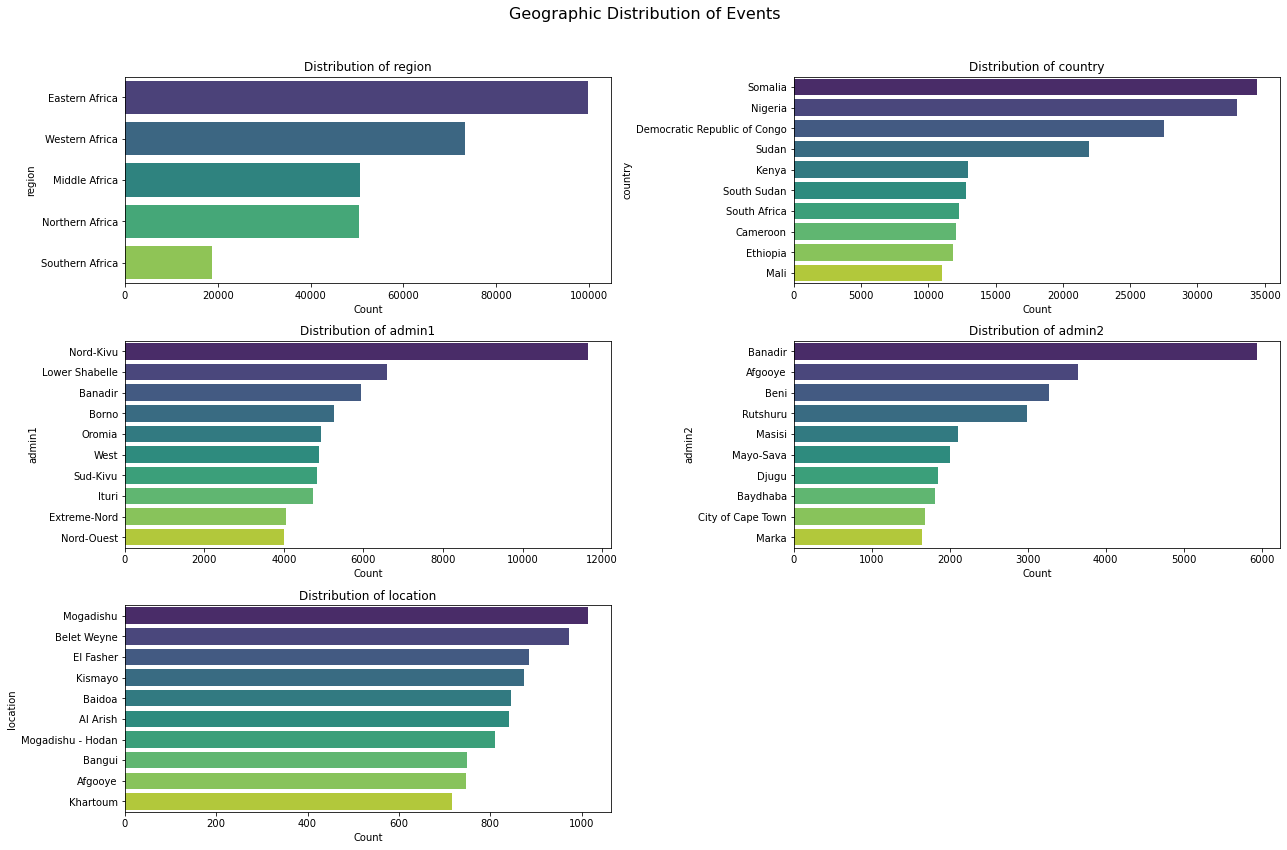

In [23]:
# Define geographic columns
geo_columns = ['region', 'country', 'admin1', 'admin2', 'location']
# Determine the number of required rows
num_plots = len(geo_columns)
rows = (num_plots // 2) + (num_plots % 2)
# Set up the figure and axes
fig, axes = plt.subplots(rows, 2, figsize=(18, 12))
fig.suptitle('Geographic Distribution of Events', fontsize=16)
# Flatten axes if multiple rows exist, otherwise make it a list
if rows > 1:
    axes = axes.flatten()
else:
    axes = [axes] 
# Plot each column
for i, col in enumerate(geo_columns):
    sns.countplot(y=df1[col], order=df1[col].value_counts().index[:10], ax=axes[i], palette="viridis")  
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel('Count')
    axes[i].set_ylabel(col)
# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])  # Delete empty subplot

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


#### Geographic Distribution Interpretation 
> * Region - Eastern Africa has the highest number of conflict events, followed by Northern and Western Africa.
> * Country - Somalia and Nigeria are the most affected, with ongoing insurgencies and civil unrest.
> * Admin1 - North Kivu, Lower Shabelle, and Banadir are key conflict hotspots.
> * Admin2 - Benadir and Afgooye report the highest number of incidents. 

### Bivariate Analysis Plan

> * Numerical vs. Numerical Analysis for example Correlation between fatalities and event type, Use pairplots and correlation matrices to check relationships between numerical features.

#### Numerical vs. Numerical Analysis

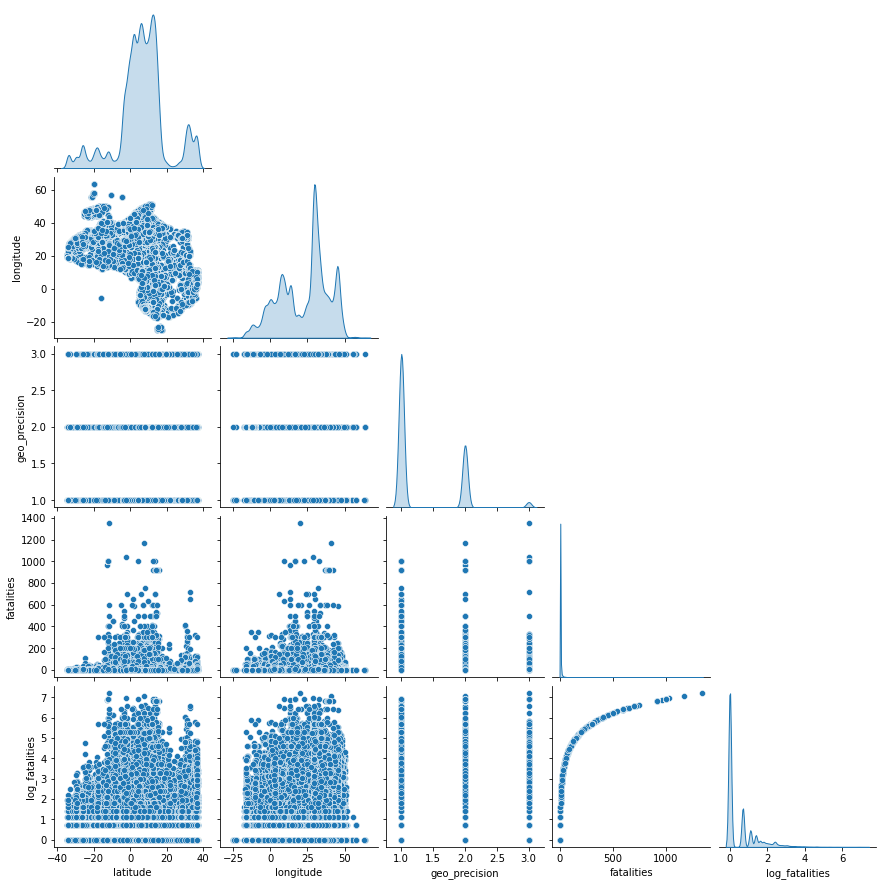

In [24]:
# Selecting numerical columns for pairplot
num_cols = ['latitude', 'longitude', 'geo_precision', 'fatalities', 'log_fatalities']
# Pairplot with KDE diagonal and corner=True to avoid duplicate plots
sns.pairplot(df1[num_cols], diag_kind='kde', corner=True)
# Show the plot
plt.show()

#### Interpretation of the Pairplot
> * Geospatial Distribution i.e. Latitude & Longitude, The scatter plots between latitude and longitude suggest distinct clusters, possibly representing regions with frequent conflict events. These clusters may align with high-risk conflict zones in Africa.
> * Geo-Precision vs. Other Variables, geo_precision is categorical (1, 2, or 3), limiting its numerical correlation. hence, It does not show a strong relationship with other variables, indicating location precision varies independently of fatalities or geography.
> * Fatalities vs. Log-Fatalities, fatalities is highly skewed, with a concentration of lower values and extreme outliers. but, The log transformation i.e. log_fatalities effectively normalizes this distribution, making patterns more discernible.
> * Fatalities vs. Geographical Variables, There’s no strong linear relationship between fatalities and location, though some regions may have higher conflict severity.


#### Numerical vs. Numerical Analysis

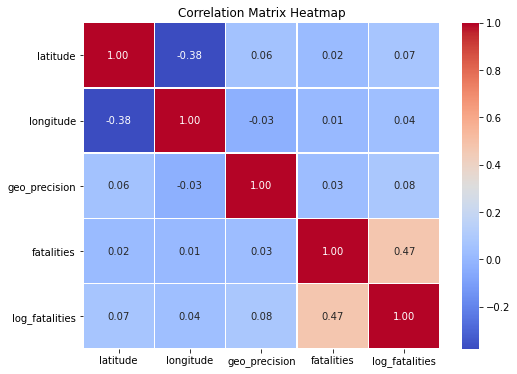

In [25]:
# Selecting numerical columns
numerical_cols = ['latitude', 'longitude', 'geo_precision', 'fatalities', 'log_fatalities']
# Compute correlation matrix
corr_matrix = df[numerical_cols].corr()
# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

#### Numerical vs. Numerical Analysis Interpretation:
> * There are no strong correlations in this dataset, except for the expected relationship between fatalities and log_fatalities. Other variables show minimal influence on each other, suggesting that conflict events are widely distributed across different locations with no dominant numerical pattern.

### Hypothesis Testing

#### Event Type vs. Fatalities (ANOVA)
> * Null Hypothesis (H₀): The average number of fatalities does not significantly differ across different event types.
> * Alternative Hypothesis (H₁): Some event types are associated with significantly higher or lower fatalities.

In [26]:
# Create a subset for this hypothesis test
df_hypothesis1 = df1[['event_type', 'log_fatalities']]
# Perform ANOVA test
event_groups = [group['log_fatalities'].values for _, group in df_hypothesis1.groupby('event_type')]
anova_stat, p_value = stats.f_oneway(*event_groups)
# Print the results
print(f"ANOVA Test Statistic: {anova_stat:.4f}")
print(f"P-value: {p_value:.4f}")
# Interpretation
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: Fatalities significantly differ across event types.")
else:
    print("Fail to reject the null hypothesis: No significant difference in fatalities across event types.")

ANOVA Test Statistic: 12066.1573
P-value: 0.0000
Reject the null hypothesis: Fatalities significantly differ across event types.


#### Interpretation Event Type and Fatalities
> Since p < 0.05, we reject the null hypothesis. This confirms that fatalities significantly vary by event type that is Some event types are far more lethal than others. This insight can help policymakers, security analysts, and businesses assess which types of conflicts pose the greatest risks.

#### Region vs. Conflict Frequency (Chi-Square Test)
> * H₀: There is no significant difference in conflict frequency across regions.
> * H₁: Certain regions experience significantly more or fewer conflicts than expected.

In [27]:
# Group by 'region' and 'event_type' to count occurrences of each event type by region
region_event_counts = df1.groupby(['region', 'event_type']).size().unstack(fill_value=0)
# Perform the Chi-Square test
chi2_stat, p_val, dof, expected = chi2_contingency(region_event_counts)
# Print results
print(f"Chi-Square Statistic: {chi2_stat:.4f}")
print(f"P-value: {p_val:.4f}")
# Interpret results
if p_val < 0.05:
    print("Reject the null hypothesis: There is a significant difference in conflict frequency across regions.")
else:
    print("Fail to reject the null hypothesis: Conflict occurrence is independent of the region.")


Chi-Square Statistic: 44930.9787
P-value: 0.0000
Reject the null hypothesis: There is a significant difference in conflict frequency across regions.


#### Interpretation of Region vs. Conflict Frequency
> The chi-square test yielded a test statistic of 44930.9787 with a p-value of 0.0000, Since the p-value is extremely small, we reject the null hypothesis (H₀). This means that conflict occurrence is not evenly distributed across regions—certain regions experience significantly higher or lower conflict frequencies than expected. This finding suggests that some regions are more prone to conflict, while others remain relatively stable. 

#### Interaction Type vs. Fatalities (ANOVA)
> * H₀: The number of fatalities does not significantly vary based on the type of interactions (e.g., state vs. rebel group).
> * H₁: Certain interaction types result in significantly higher or lower fatalities.

In [28]:
# Ensure the dataset contains only relevant columns and no missing values
df_anova = df1[['interaction', 'log_fatalities']]
# Performing ANOVA test
interaction_groups = [group['log_fatalities'].values for _, group in df_anova.groupby('interaction')]
anova_stat, p_value = stats.f_oneway(*interaction_groups)
# Print results
print(f"ANOVA Test Statistic: {anova_stat:.4f}")
print(f"P-value: {p_value:.4f}")
# Interpretation
if p_value < 0.05:
    print("Reject the null hypothesis: Fatalities significantly differ based on interaction type.")
else:
    print("Fail to reject the null hypothesis: No significant difference in fatalities across interaction types.")

ANOVA Test Statistic: 1129.8259
P-value: 0.0000
Reject the null hypothesis: Fatalities significantly differ based on interaction type.


#### Interpretation of Interaction Type vs. Fatalities
> The ANOVA test yielded a test statistic of 1129.8259 with a p-value of 0.0000. Since the p-value is extremely small, we reject the null hypothesis (H₀). This means that fatalities are not evenly distributed across interaction types—certain interaction types result in significantly higher or lower fatalities than others. This finding suggests that some types of interactions, such as those involving state forces or rebel groups, may be more lethal, while others result in fewer fatalities.

## Modeling

> To develop a conflict occurrence prediction model, we needed a binary target variable indicating whether a conflict took place or not but the dataset does not have a binary target variable column, so we need to create one. We will use event type column

Model to be analyized

> * Logistic Regression
> * Random forest classifier
> * XGboost

In [29]:
"""
We will analyze the value counts of the event_type column to determine which event types can 
be classified as conflict-related. Based on this assessment, we will create a binary target 
variable (conflict_occurred) to differentiate between conflict and non-conflict events, 
enabling us to build a predictive model
"""
# Check unique values in event_type
df1['event_type'].value_counts()

Violence against civilians    83530
Battles                       82679
Protests                      35198
Riots                         33988
Strategic developments        32994
Explosions/Remote violence    24617
Name: event_type, dtype: int64

#### From the event types:
The following cleary indicate conflict since they can be defined as violent actions where the aim is a direct harm to people or infrastructure
> * Battles
> * Violence against civilians
> * Explosions/Remote violence

This are non conflict incidencens they can be defined as non violent actions since the aim was not to direct harm or destroy infrastructure
> * Riots
> * Strategic Developments
> * Protests

### Feature Engineering
> Using the event type and the decision made in classifying if an event is a conflict or a non conflict, we will create a new feature called ***conflict_occured*** where conflict related events = 1 and non conflict related events = 0

In [30]:
# Define conflict event types
conflict_events = ['Battles', 'Violence against civilians', 'Explosions/Remote violence']
# Create conflict occurrence column 
df1['conflict_occurred'] = df1['event_type'].isin(conflict_events).astype(int)
# Check the distribution
df1['conflict_occurred'].value_counts()

1    190826
0    102180
Name: conflict_occurred, dtype: int64

### Data preprocessing
Modifying the dataset to use with the most relevant columns that contribute more towards the models to be analysed

In [31]:
# Select only relevant columns
selected_columns = ['year', 'latitude', 'longitude', 'log_fatalities',
                    'disorder_type', 'event_type', 'sub_event_type',
                    'civilian_targeting', 'country', 'conflict_occurred']
df_modified = df1[selected_columns]
# Display the first few rows
df_modified.head()

,year,latitude,longitude,log_fatalities,disorder_type,event_type,sub_event_type,civilian_targeting,country,conflict_occurred
0,2025,18.9689,2.0041,0.0,Political violence,Explosions/Remote violence,Remote explosive/landmine/IED,No,Mali,1
1,2025,11.3693,-0.3600,0.0,Political violence,Battles,Armed clash,No,Burkina Faso,1
2,2025,18.5558,1.1113,0.0,Political violence,Violence against civilians,Attack,Yes,Mali,1
3,2025,6.4667,-2.3333,0.0,Political violence,Violence against civilians,Attack,Yes,Ghana,1
4,2025,5.5560,-0.1969,0.0,Political violence,Riots,Mob violence,Yes,Ghana,0


In [32]:
# Drop event_type and disorder_type columns
drop_cols = [col for col in df_modified.columns if 'event_type' in col or 'disorder_type' in col]
df_modified = df_modified.drop(columns=drop_cols)

#### Checking Multicollineality

In [33]:
# Select only numerical columns from df_modified
num_col = df_modified.select_dtypes(include=[np.number])
# Ensure num_col is a DataFrame
num_col = num_col.copy()
# Calculate VIF
vif_data = pd.DataFrame()
vif_data["Variable"] = list(num_col)
vif_data["VIF"] = [variance_inflation_factor(num_col.values, i) for i in range(num_col.shape[1])]
vif_data = vif_data.sort_values(by='VIF', ascending=False)
print(vif_data)

            Variable       VIF
0               year  5.229413
2          longitude  3.521990
4  conflict_occurred  3.459058
3     log_fatalities  1.659500
1           latitude  1.431991


In [34]:
# spliting data according to the data type
## assign data types variable names 
num_col = df_modified.select_dtypes(include=['int64', 'float64']).columns
cat_col = df_modified.select_dtypes(include=['object', 'bool']).columns
# display the columns
display(num_col)
display(cat_col)

Index(['year', 'latitude', 'longitude', 'log_fatalities'], dtype='object')

Index(['civilian_targeting', 'country'], dtype='object')

#### Perform one hot enconding to our cateagorical variables

In [35]:
# Select categorical columns
cat_col = df_modified.select_dtypes(include=["object", "bool"]).columns
# One-hot encode categorical variables & convert boolean to int
df_modified = pd.get_dummies(df_modified, columns=cat_col, drop_first=True).astype(int)
# Rename columns to remove duplicate "_True"
df_modified.columns = df_modified.columns.str.replace(r'_True_True$', '_True', regex=True)
# Preview the cleaned dataframe
df_modified.head()

,year,latitude,longitude,log_fatalities,conflict_occurred,civilian_targeting_Yes,country_Angola,country_Benin,country_Botswana,country_Burkina Faso,...,country_South Africa,country_South Sudan,country_Sudan,country_Tanzania,country_Togo,country_Tunisia,country_Uganda,country_Zambia,country_Zimbabwe,country_eSwatini
0,2025,18,2,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2025,11,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,2025,18,1,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2025,6,-2,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2025,5,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Defining X and y, The three models will use the test size of 20% and random_state of 42 for uniformity across the models

In [36]:
## Defining our X and y
X = df_modified.drop('conflict_occurred', axis=1)
y = df_modified['conflict_occurred']
## Splitting the data into train sets and test sets using 20% and random_state of 42
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42,  stratify=y)

In [37]:
# Check the shape of the splits
print(f"X_train shape: {X_train.shape}, X_test shape: {X_test.shape}")
print(f"y_train distribution:\n{y_train.value_counts(normalize=True)}")
print(f"y_test distribution:\n{y_test.value_counts(normalize=True)}")

X_train shape: (234404, 61), X_test shape: (58602, 61)
y_train distribution:
1    0.651269
0    0.348731
Name: conflict_occurred, dtype: float64
y_test distribution:
1    0.651275
0    0.348725
Name: conflict_occurred, dtype: float64


#### Intergrating pipeline to the models

In [51]:
# Logistic Regression Pipeline
log_reg_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(random_state=42))
])

# Random Forest Pipeline
rf_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1))
])

# XGBoost Pipeline
xgb_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', xgb.XGBClassifier(eval_metric='logloss', random_state=42))
])

#### Training and making predictions of the model

In [52]:
# Train the models
log_reg_pipeline.fit(X_train, y_train)
rf_pipeline.fit(X_train, y_train)
xgb_pipeline.fit(X_train, y_train)

# Make predictions
y_pred_log = log_reg_pipeline.predict(X_test)
y_pred_rf = rf_pipeline.predict(X_test)
y_pred_xgb = xgb_pipeline.predict(X_test)

#### Evaluating the models

In [40]:
# Compute accuracy for each model
accuracy_log = accuracy_score(y_test, y_pred_log)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)

# Print results
print(f"Logistic Regression Accuracy: {accuracy_log:.4f}\n")
print(f"Random Forest Accuracy: {accuracy_rf:.4f}\n")
print(f"XGBoost Accuracy: {accuracy_xgb:.4f}")

# Detailed performance
print("\nLogistic Regression Performance:\n", classification_report(y_test, y_pred_log))
print("\nRandom Forest Performance:\n", classification_report(y_test, y_pred_rf))
print("\nXGBoost Performance:\n", classification_report(y_test, y_pred_xgb))


Logistic Regression Accuracy: 0.8071

Random Forest Accuracy: 0.8403

XGBoost Accuracy: 0.8422

Logistic Regression Performance:
               precision    recall  f1-score   support

           0       0.73      0.71      0.72     20436
           1       0.85      0.86      0.85     38166

    accuracy                           0.81     58602
   macro avg       0.79      0.79      0.79     58602
weighted avg       0.81      0.81      0.81     58602


Random Forest Performance:
               precision    recall  f1-score   support

           0       0.78      0.75      0.77     20436
           1       0.87      0.89      0.88     38166

    accuracy                           0.84     58602
   macro avg       0.83      0.82      0.82     58602
weighted avg       0.84      0.84      0.84     58602


XGBoost Performance:
               precision    recall  f1-score   support

           0       0.79      0.75      0.77     20436
           1       0.87      0.89      0.88     38166



#### Before hyperparameters interpretations
> * Logistic Regression model achieved an accuracy of 80.71%, with a precision of 0.73 for class 0 and 0.85 for class 1. The recall values were 0.71 and 0.86, respectively, meaning the model slightly favored predicting class 1 (conflict) over class 0 (no conflict). The overall F1-scores were consistent with precision and recall, indicating a fairly balanced performance.
> * Random Forest model achieved an accuracy of 84.03%, with a precision of 0.78 for class 0 and 0.87 for class 1. The recall values indicate that the model correctly identified 75% of class 0 instances and 89% of class 1 instances. The overall F1-score was 0.77 for class 0 and 0.88 for class 1, showing that the model was already performing well, especially in predicting class 1 events.
> * XGBoost model achieved an accuracy of 0.8422, with a precision of 0.78 for class 0 and 0.87 for class 1. The recall values were 0.75 for class 0 and 0.89 for class 1, indicating that the model was slightly better at capturing positive cases than negative ones. The F1-scores, which balance precision and recall, were 0.77 for class 0 and 0.88 for class 1, contributing to an overall strong performance. However, there was still room for improvement, particularly in recall for class 0.

#### Hyperparameter tunning for Logistic Regression

In [41]:
param_grid_logreg = {
    'classifier__C': [0.01, 0.1, 1, 10, 100],  
    'classifier__penalty': ['l1', 'l2'],  
    'classifier__solver': ['liblinear']
}

grid_logreg = GridSearchCV(log_reg_pipeline, param_grid_logreg, scoring='f1', cv=3, n_jobs=-1)
grid_logreg.fit(X_train, y_train)

# Get best parameters
best_params_logreg = grid_logreg.best_params_
print("Best Hyperparameters for Logistic Regression:", best_params_logreg)

Best Hyperparameters for Logistic Regression: {'classifier__C': 1, 'classifier__penalty': 'l1', 'classifier__solver': 'liblinear'}


#### Retrain the logistic regression with the best hyperparameters

In [42]:
# Update the pipeline with the best hyperparameters
best_log_reg_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(C=1, penalty='l1', solver='liblinear', random_state=42))
])

# Train the optimized model
best_log_reg_pipeline.fit(X_train, y_train)
# Make predictions
y_pred_best_log = best_log_reg_pipeline.predict(X_test)
# Evaluate the optimized model
accuracy = accuracy_score(y_test, y_pred_best_log)

print("\nOptimized Logistic Regression Performance:\n")
print(f"Accuracy: {accuracy:.4f}")
print(classification_report(y_test, y_pred_best_log))



Optimized Logistic Regression Performance:

Accuracy: 0.8071
              precision    recall  f1-score   support

           0       0.73      0.72      0.72     20436
           1       0.85      0.86      0.85     38166

    accuracy                           0.81     58602
   macro avg       0.79      0.79      0.79     58602
weighted avg       0.81      0.81      0.81     58602



#### After Hyperparameters interpretation
> After tuning, the accuracy remained 80.71%, showing that the optimized parameters did not significantly impact overall performance. However, recall for class 0 slightly improved from 0.71 to 0.72, meaning the model became slightly better at identifying non-conflict cases. Precision and F1-scores remained nearly unchanged. This suggests that the default hyperparameters were already effective, and further tuning may not yield significant improvements.

#### Hyperparameter tunning for Random forest classifier

In [43]:
param_grid_rf = {
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [10, 20],
    'classifier__min_samples_split': [2, 5],
    'classifier__min_samples_leaf': [1, 2]
}

grid_rf = GridSearchCV(rf_pipeline, param_grid_rf, scoring='f1', cv=3, n_jobs=-1)
grid_rf.fit(X_train, y_train)

# Get best parameters
best_params_rf = grid_rf.best_params_
print("Best Hyperparameters for Random Forest:", best_params_rf)

Best Hyperparameters for Random Forest: {'classifier__max_depth': 20, 'classifier__min_samples_leaf': 2, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 200}


#### Retrain random forest model using the best hyperparameters

In [44]:
# Update the pipeline with the best hyperparameters
best_rf_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier(
        n_estimators=200,
        max_depth=20,
        min_samples_leaf=2,
        min_samples_split=2,
        random_state=42,
        n_jobs=-1
    ))
])

# Train the optimized model
best_rf_pipeline.fit(X_train, y_train)
# Make predictions
y_pred_best_rf = best_rf_pipeline.predict(X_test)
# Calculate accuracy
rf_accuracy = accuracy_score(y_test, y_pred_best_rf)
print(f"\nOptimized Random Forest Accuracy: {rf_accuracy:.4f}")
# Print classification report
print("\nOptimized Random Forest Performance:\n")
print(classification_report(y_test, y_pred_best_rf))


Optimized Random Forest Accuracy: 0.8393

Optimized Random Forest Performance:

              precision    recall  f1-score   support

           0       0.77      0.77      0.77     20436
           1       0.88      0.88      0.88     38166

    accuracy                           0.84     58602
   macro avg       0.82      0.82      0.82     58602
weighted avg       0.84      0.84      0.84     58602



#### After Hyperparameters interpretation
> The model’s accuracy slightly decreased to 83.93%, with class 0 precision reducing slightly to 0.77, while class 1 precision improved to 0.88. The recall values became more balanced, with class 0 increasing to 77%, while class 1 remained stable at 88%. The minor accuracy drop suggests that tuning made the model slightly more balanced between both classes but did not significantly improve its predictive power. The trade-off in precision and recall should be considered when deciding which version to use.

#### Hyperparameter tunning for XGboost

In [48]:
# Define parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 6],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Initialize XGBoost
xgb_clf = xgb.XGBClassifier(eval_metric='logloss', random_state=42)

# Randomized Search for best hyperparameters
random_search = RandomizedSearchCV(
    estimator=xgb_clf,
    param_distributions=param_grid,
    scoring='f1',
    n_iter=20,  
    cv=5,  
    verbose=2,
    n_jobs=-1,
    random_state=42
)

# Fit model on training data
random_search.fit(X_train, y_train)

# Get best parameters
best_params = random_search.best_params_
print("Best Hyperparameters:", best_params)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 22 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  8.4min finished


Best Hyperparameters: {'subsample': 1.0, 'n_estimators': 100, 'max_depth': 6, 'learning_rate': 0.2, 'colsample_bytree': 1.0}


#### Retrain XGBoost using the best parameters

In [50]:
# Retrain XGBoost with best hyperparameters
best_xgb = xgb.XGBClassifier(
    subsample=1.0, 
    n_estimators=100, 
    max_depth=6, 
    learning_rate=0.2, 
    colsample_bytree=1.0,
    eval_metric='logloss', 
    random_state=42
)

# Train the optimized model
best_xgb.fit(X_train, y_train)

# Make predictions
y_pred_best_xgb = best_xgb.predict(X_test)

# Evaluate performance
from sklearn.metrics import accuracy_score, classification_report

print(f"\nOptimized XGBoost Accuracy: {accuracy_score(y_test, y_pred_best_xgb):.4f}")
print("\nOptimized XGBoost Performance:\n")
print(classification_report(y_test, y_pred_best_xgb))



Optimized XGBoost Accuracy: 0.8406

Optimized XGBoost Performance:

              precision    recall  f1-score   support

           0       0.78      0.75      0.77     20436
           1       0.87      0.89      0.88     38166

    accuracy                           0.84     58602
   macro avg       0.83      0.82      0.82     58602
weighted avg       0.84      0.84      0.84     58602



#### After Hyperparameters interpretation
> XGBoost model achieved an accuracy of 0.8406, maintaining strong predictive performance. The precision for both classes remained stable, while recall for class 0 stayed at 0.75, ensuring a balanced detection of conflict and non-conflict events. The macro and weighted averages remained consistent, indicating that the model retained its ability to generalize well across different cases. These results suggest that hyperparameter tuning fine-tuned the model without drastically altering its effectiveness.

### Interpretation of Results

#### Logistic Regression
Accuracy: 80.71%
> * Class 0 Recall: 72% 
> * Class 1  Recall: 86% 
Logistic Regression performs reasonably well, but it has a lower recall for class 0, meaning it struggles more with identifying areas where conflict will not occur.

#### Random Forest
Accuracy: 83.93%
> * Class 0 Recall: 77% 
> * Class 1 Recall: 88% 
Random Forest improves both recall and precision over Logistic Regression, making it a more balanced choice for conflict prediction.

#### XGBoost
Accuracy: 84.70% 
> * Class 0 Recall: 76%
> * Class 1 Recall: 89% 
XGBoost has the highest accuracy and F1-score, meaning it performs best overall in predicting both conflict and no-conflict events. It maintains a strong balance between precision and recall.

### Best Model Recommendation 
### XGBoost is the best model to choose because:
> * Highest accuracy of 84.06% – Outperforms the other models.
> * Best recall for conflict cases of 89%  – This will ensures high detection of conflict-prone areas.
> * Good balance between precision and recall – Minimizes false positives and false negatives.